In [77]:
# !pip install country_converter
# data
import pandas as pd
import numpy as np
import country_converter as coco
from IPython.display import HTML # 导入HTML
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# nltk
import nltk

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')


<ipython-input-77-b3bfff048b62>:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [23]:
dict_path="E:/数据挖掘/数维杯/2022“ShuWei Cup”_Problem/2022“ShuWei Cup”_Problem/2022_“ShuWei Cup”C_Problem/problem2"
data_path=dict_path+"/data"
img_path=dict_path+"/img"

In [28]:
data=pd.read_csv(data_path+"/ADNIMERGE_New.csv",low_memory=False)
data.head(10)

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,FBB,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,FLDSTRENG,FSVERSION,IMAGEUID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,mPACCdigit,mPACCtrailsB,EXAMDATE_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,LDELTOTAL_BL,DIGITSCOR_bl,TRABSCOR_bl,FAQ_bl,mPACCdigit_bl,mPACCtrailsB_bl,FLDSTRENG_bl,FSVERSION_bl,IMAGEUID_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-9-8,CN,74.3,Male,16,Not Hisp/Latino,White,Married,0.0,1.33615,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,CN,-4.31670,-4.11991,2005-9-8,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,-4.31670,-4.11991,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-9-12,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.10860,NaN,NaN,NaN,741.5,239.7,22.83,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,Dementia,-16.29050,-15.87370,2005-9-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.29050,-15.87370,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.5,239.7,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,58:48.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-3-13,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.07796,NaN,NaN,NaN,NaN,NaN,NaN,6.0,19.00,30.00,10.0,24.0,19.0,2.0,6.0,100.0000,NaN,19.0,135.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,31863.0,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,Dementia,-14.80130,-13.16990,2005-9-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.29050,-15.87370,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.5,239.7,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,58:48.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-9-12,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.11626,NaN,NaN,NaN,601.4,251.7,24.18,3.5,24.00,35.00,10.0,17.0,31.0,2.0,7.0,100.0000,0.0,21.0,126.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35576.0,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,Dementia,-21.02930,-19.83780,2005-9-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-

In [32]:
Cognitive_Evaluation_Columns=["CDRSB","ADAS11","ADAS13","ADASQ4","MMSE","RAVLT_immediate","RAVLT_learning","RAVLT_forgetting","RAVLT_perc_forgetting","LDELTOTAL","DIGITSCOR","TRABSCOR","FAQ","MOCA","EcogPtMem_bl","EcogPtLang_bl","EcogPtVisspat_bl","EcogPtPlan_bl","EcogPtOrgan_bl","EcogPtDivatt_bl","EcogPtTotal_bl","EcogSPMem_bl","EcogSPLang_bl","EcogSPVisspat_bl","EcogSPPlan_bl","EcogSPOrgan_bl","EcogSPDivatt_bl","EcogSPTotal_bl"]
Anatomical_Structure_Columns=["IMAGEUID","Ventricles","Hippocampus","WholeBrain","Entorhinal","Fusiform","MidTemp","ICV"] 
Target_Columns=["DX_bl"]

In [33]:
len(Cognitive_Evaluation_Columns)#MOCA 

28

In [34]:
data_feature=data[Cognitive_Evaluation_Columns+Anatomical_Structure_Columns+Target_Columns]
data_feature.head()

,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,IMAGEUID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX_bl
0,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,CN
1,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,AD
2,6.0,19.00,30.00,10.0,24.0,19.0,2.0,6.0,100.0000,NaN,19.0,135.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31863.0,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,AD
3,3.5,24.00,35.00,10.0,17.0,31.0,2.0,7.0,100.0000,0.0,21.0,126.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35576.0,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,AD
4,8.0,25.67,37.67,10.0,19.0,23.0,1.0,5.0,100.0000,0.0,16.0,275.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88252.0,97420.0,5139.0,1088560.0,1175.0,14033.0,16398.0,1903420.0,AD


In [35]:
data_feature.shape

(16222, 37)

In [36]:
DX_bl_dict={
    "LMCI":0,
    "CN":1,
    "EMCI":2,
    "AD":3,
    "SMC":4
}

In [37]:
data_feature["DX_bl"]=data_feature["DX_bl"].map(DX_bl_dict)

In [38]:
data1=data_feature.fillna(0)
data1.head()

,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,IMAGEUID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX_bl
0,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,1.0
1,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,3.0
2,6.0,19.00,30.00,10.0,24.0,19.0,2.0,6.0,100.0000,0.0,19.0,135.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31863.0,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,3.0
3,3.5,24.00,35.00,10.0,17.0,31.0,2.0,7.0,100.0000,0.0,21.0,126.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35576.0,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,3.0
4,8.0,25.67,37.67,10.0,19.0,23.0,1.0,5.0,100.0000,0.0,16.0,275.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88252.0,97420.0,5139.0,1088560.0,1175.0,14033.0,16398.0,1903420.0,3.0


In [39]:
data.isnull().sum()

RID             0
COLPROT         0
ORIGPROT        0
PTID            0
SITE            0
               ..
Years_bl        0
Month_bl        0
Month           0
M               0
update_stamp    0
Length: 116, dtype: int64

In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16222 entries, 0 to 16221
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDRSB                  16222 non-null  float64
 1   ADAS11                 16222 non-null  float64
 2   ADAS13                 16222 non-null  float64
 3   ADASQ4                 16222 non-null  float64
 4   MMSE                   16222 non-null  float64
 5   RAVLT_immediate        16222 non-null  float64
 6   RAVLT_learning         16222 non-null  float64
 7   RAVLT_forgetting       16222 non-null  float64
 8   RAVLT_perc_forgetting  16222 non-null  float64
 9   LDELTOTAL              16222 non-null  float64
 10  DIGITSCOR              16222 non-null  float64
 11  TRABSCOR               16222 non-null  float64
 12  FAQ                    16222 non-null  float64
 13  MOCA                   16222 non-null  float64
 14  EcogPtMem_bl           16222 non-null  float64
 15  Ec

In [41]:

from sklearn.model_selection import train_test_split # 拆分数据
import numpy as np
X_var,y_var= data1.iloc[:,:-1],data1.iloc[:,-1]
# X_var,y_var= train.iloc[:,1:],train['表面风化']

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 123)
X_var

,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,IMAGEUID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,0.0,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0
1,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,0.0,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0
2,6.0,19.00,30.00,10.0,24.0,19.0,2.0,6.0,100.0000,0.0,19.0,135.0,12.0,0.0,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,31863.0,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0
3,3.5,24.00,35.00,10.0,17.0,31.0,2.0,7.0,100.0000,0.0,21.0,126.0,17.0,0.0,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,35576.0,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0
4,8.0,25.67,37.67,10.0,19.0,23.0,1.0,5.0,100.0000,0.0,16.0,275.0,14.0,0.0,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,0.000,0.00000,0.00000,0.0,0.00000,0.00,0.00000,88252.0,97420.0,5139.0,1088560.0,1175.0,14033.0,16398.0,1903420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,2.625,1.11111,1.16667,1.2,1.16667,1.50,1.50000,1.500,1.00000,1.00000,1.0,1.00000,1.00,1.10526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16218,0.0,4.67,8.67,4.0,30.0,50.0,11.0,5.0,35.7143,13.0,0.0,67.0,0.0,25.0,1.500,1.00000,1.00000,1.0,1.00000,1.50,1.15789,1.625,1.11111,1.16667,1.0,1.00000,2.00,1.28947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16219,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,1.625,1.88889,1.00000,1.0,1.40000,1.25,1.43243,1.500,1.33333,1.00000,1.0,1.33333,1.25,1.26316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16220,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,1.750,1.33333,1.28571,1.0,1.00000,1.00,1.28205,1.625,1.11111,1.14286,1.0,1.00000,1.00,1.17949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:

from sklearn.tree import DecisionTreeClassifier as dtc # 树算法
from sklearn.metrics import accuracy_score
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)
pred_model = model.predict(X_test)
print(accuracy_score(y_test, pred_model))


0.601848998459168


In [48]:
# 用GridSearchCV寻找最优参数（列表）
param = [{'criterion':['gini'],'max_depth':[30,50,60,100],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5]},
         {'criterion':['gini','entropy']},
         {'max_depth': [30,60,100], 'min_impurity_decrease':[0.1,0.2,0.5]}]
grid = GridSearchCV(dtc(),param_grid=param,cv=6)
grid.fit(X_train,y_train)
print('最优分类器:',grid.best_params_,'最优分数:', grid.best_score_)  # 得到最优的参数和分值


最优分类器: {'criterion': 'entropy'} 最优分数: 0.7245122643329087


KeyError: 'mean_train_score'

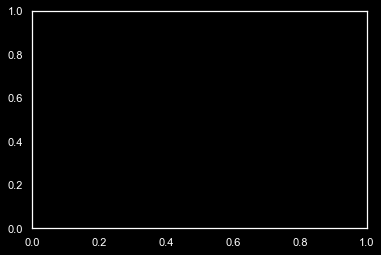

In [51]:
# # 通过cv_results观察过程并做图
# min_samples_leaf = np.arange(1,10)
# param = {'min_samples_leaf': min_samples_leaf}
# clf = GridSearchCV(dtc(),param_grid=param,cv=6)
# clf.fit(X_train,y_train)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.fill_between(min_samples_leaf,clf.cv_results_['mean_train_score']+clf.cv_results_['std_train_score'],
#                  clf.cv_results_['mean_train_score']-clf.cv_results_['std_train_score'],color='b')
# ax.fill_between(min_samples_leaf,clf.cv_results_['mean_test_score']+clf.cv_results_['std_test_score'],
#                  clf.cv_results_['mean_test_score']-clf.cv_results_['std_test_score'],color='r')
# ax.plot(min_samples_leaf,clf.cv_results_['mean_train_score'],'ko-')
# ax.plot(min_samples_leaf,clf.cv_results_['mean_test_score'],'g*-')
# plt.legend()
# plt.title('GridSearchCV训练过程图')
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.serif'] = ['SimHei']  # 设置正常显示中文
# plt.show()


In [43]:

from sklearn.tree import plot_tree # 树图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_var, y_var)
feature_names = X_var.columns
target_names = ['LMCI','EN','EMCI','AD','SMC']
plt.figure(figsize=(40,30),dpi=500)
# plot_tree(model, 
#           feature_names = feature_names, 
#           class_names = target_names, 
#           filled = True, 
#           rounded = True)
 
# plt.savefig(img_path+'/DecissionTreeViusalation.png')
# plt.show()

In [52]:
## 导入XGBoost模型
from xgboost.sklearn import XGBClassifier
## 定义 XGBoost模型 
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

The accuracy of the Logistic Regression is(train): 0.9304153502350312
The accuracy of the Logistic Regression is:(test) 0.8523882896764252
The confusion matrix result:
 [[774  59   7  51   1]
 [222 913   3  33  16]
 [ 12   1 602  10   7]
 [ 32   0   2 242   1]
 [  2  15   5   0 235]]


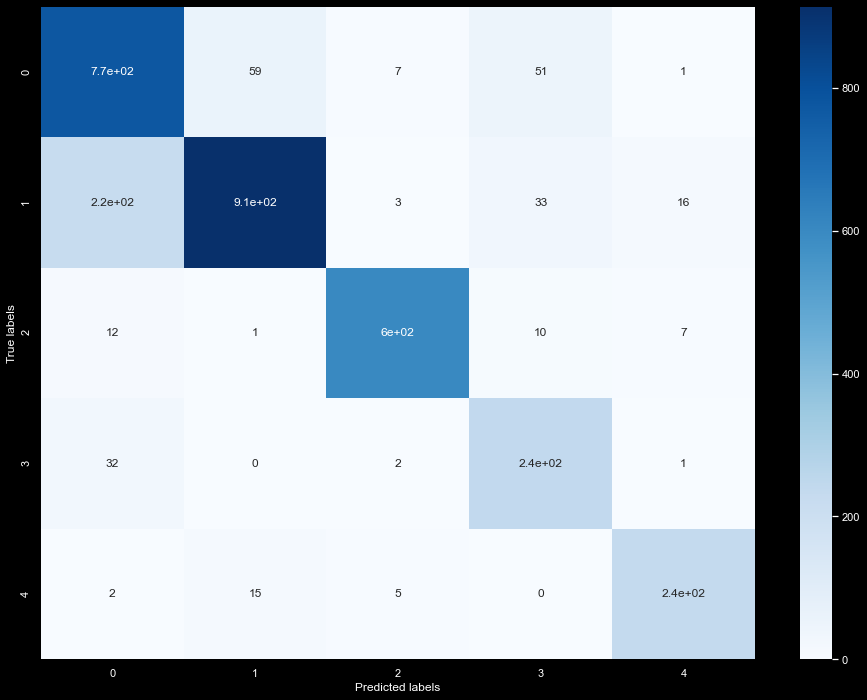

In [54]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is(train):',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:(test)',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



In [73]:
# RF


In [75]:
# Search optimal hyperparameter

n_estimators_range=[int(x) for x in np.linspace(start=50,stop=3000,num=60)]
max_features_range=['auto','sqrt']
max_depth_range=[int(x) for x in np.linspace(10,500,num=50)]
max_depth_range.append(None)
min_samples_split_range=[2,5,10]
min_samples_leaf_range=[1,2,4,8]
bootstrap_range=[True,False]

random_forest_hp_range={'n_estimators':n_estimators_range,
                        'max_features':max_features_range,
                        'max_depth':max_depth_range,
                        'min_samples_split':min_samples_split_range,
                        'min_samples_leaf':min_samples_leaf_range
                        # 'bootstrap':bootstrap_range
                        }
print(random_forest_hp_range)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 8]}


In [81]:
random_forest_model_test_base=RandomForestRegressor()
random_forest_model_test_random=RandomizedSearchCV(estimator=random_forest_model_test_base,
                                                   param_distributions=random_forest_hp_range,
                                                   n_iter=200,
                                                   n_jobs=-1,
                                                   cv=3,
                                                   verbose=1,
                                                   random_state=111
                                                   )
random_forest_model_test_random.fit(X_train,y_train)

best_hp_now=random_forest_model_test_random.best_params_
print(best_hp_now)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'n_estimators': 2900, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 180}


 {'n_estimators': 2900, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 180}


In [83]:
# Grid Search

random_forest_hp_range_2={'n_estimators':[2700,2900,3100],
                          'max_features':[12,13],
                          'max_depth':[100,180,250],
                          'min_samples_split':[2,3] # Greater than 1
                          # 'min_samples_leaf':[1,2]
                          # 'bootstrap':bootstrap_range
                          }
random_forest_model_test_2_base=RandomForestRegressor()
random_forest_model_test_2_random=GridSearchCV(estimator=random_forest_model_test_2_base,
                                               param_grid=random_forest_hp_range_2,
                                               cv=3,
                                               verbose=1,
                                               n_jobs=-1)
random_forest_model_test_2_random.fit(X_train,y_train)

best_hp_now_2=random_forest_model_test_2_random.best_params_
print(best_hp_now_2)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


NameError: name 'pprint' is not defined

In [95]:
print(best_hp_now_2)

{'max_depth': 250, 'max_features': 13, 'min_samples_split': 2, 'n_estimators': 2900}


Pearson correlation coefficient is 0.7440650537035479, and RMSE is 0.838504595255341.


Text(0.5, 1.0, 'Variable Importances')

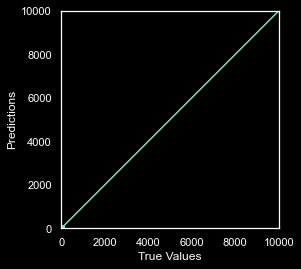

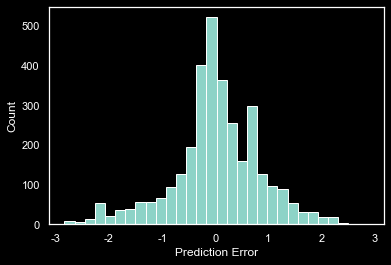

<Figure size 432x288 with 0 Axes>

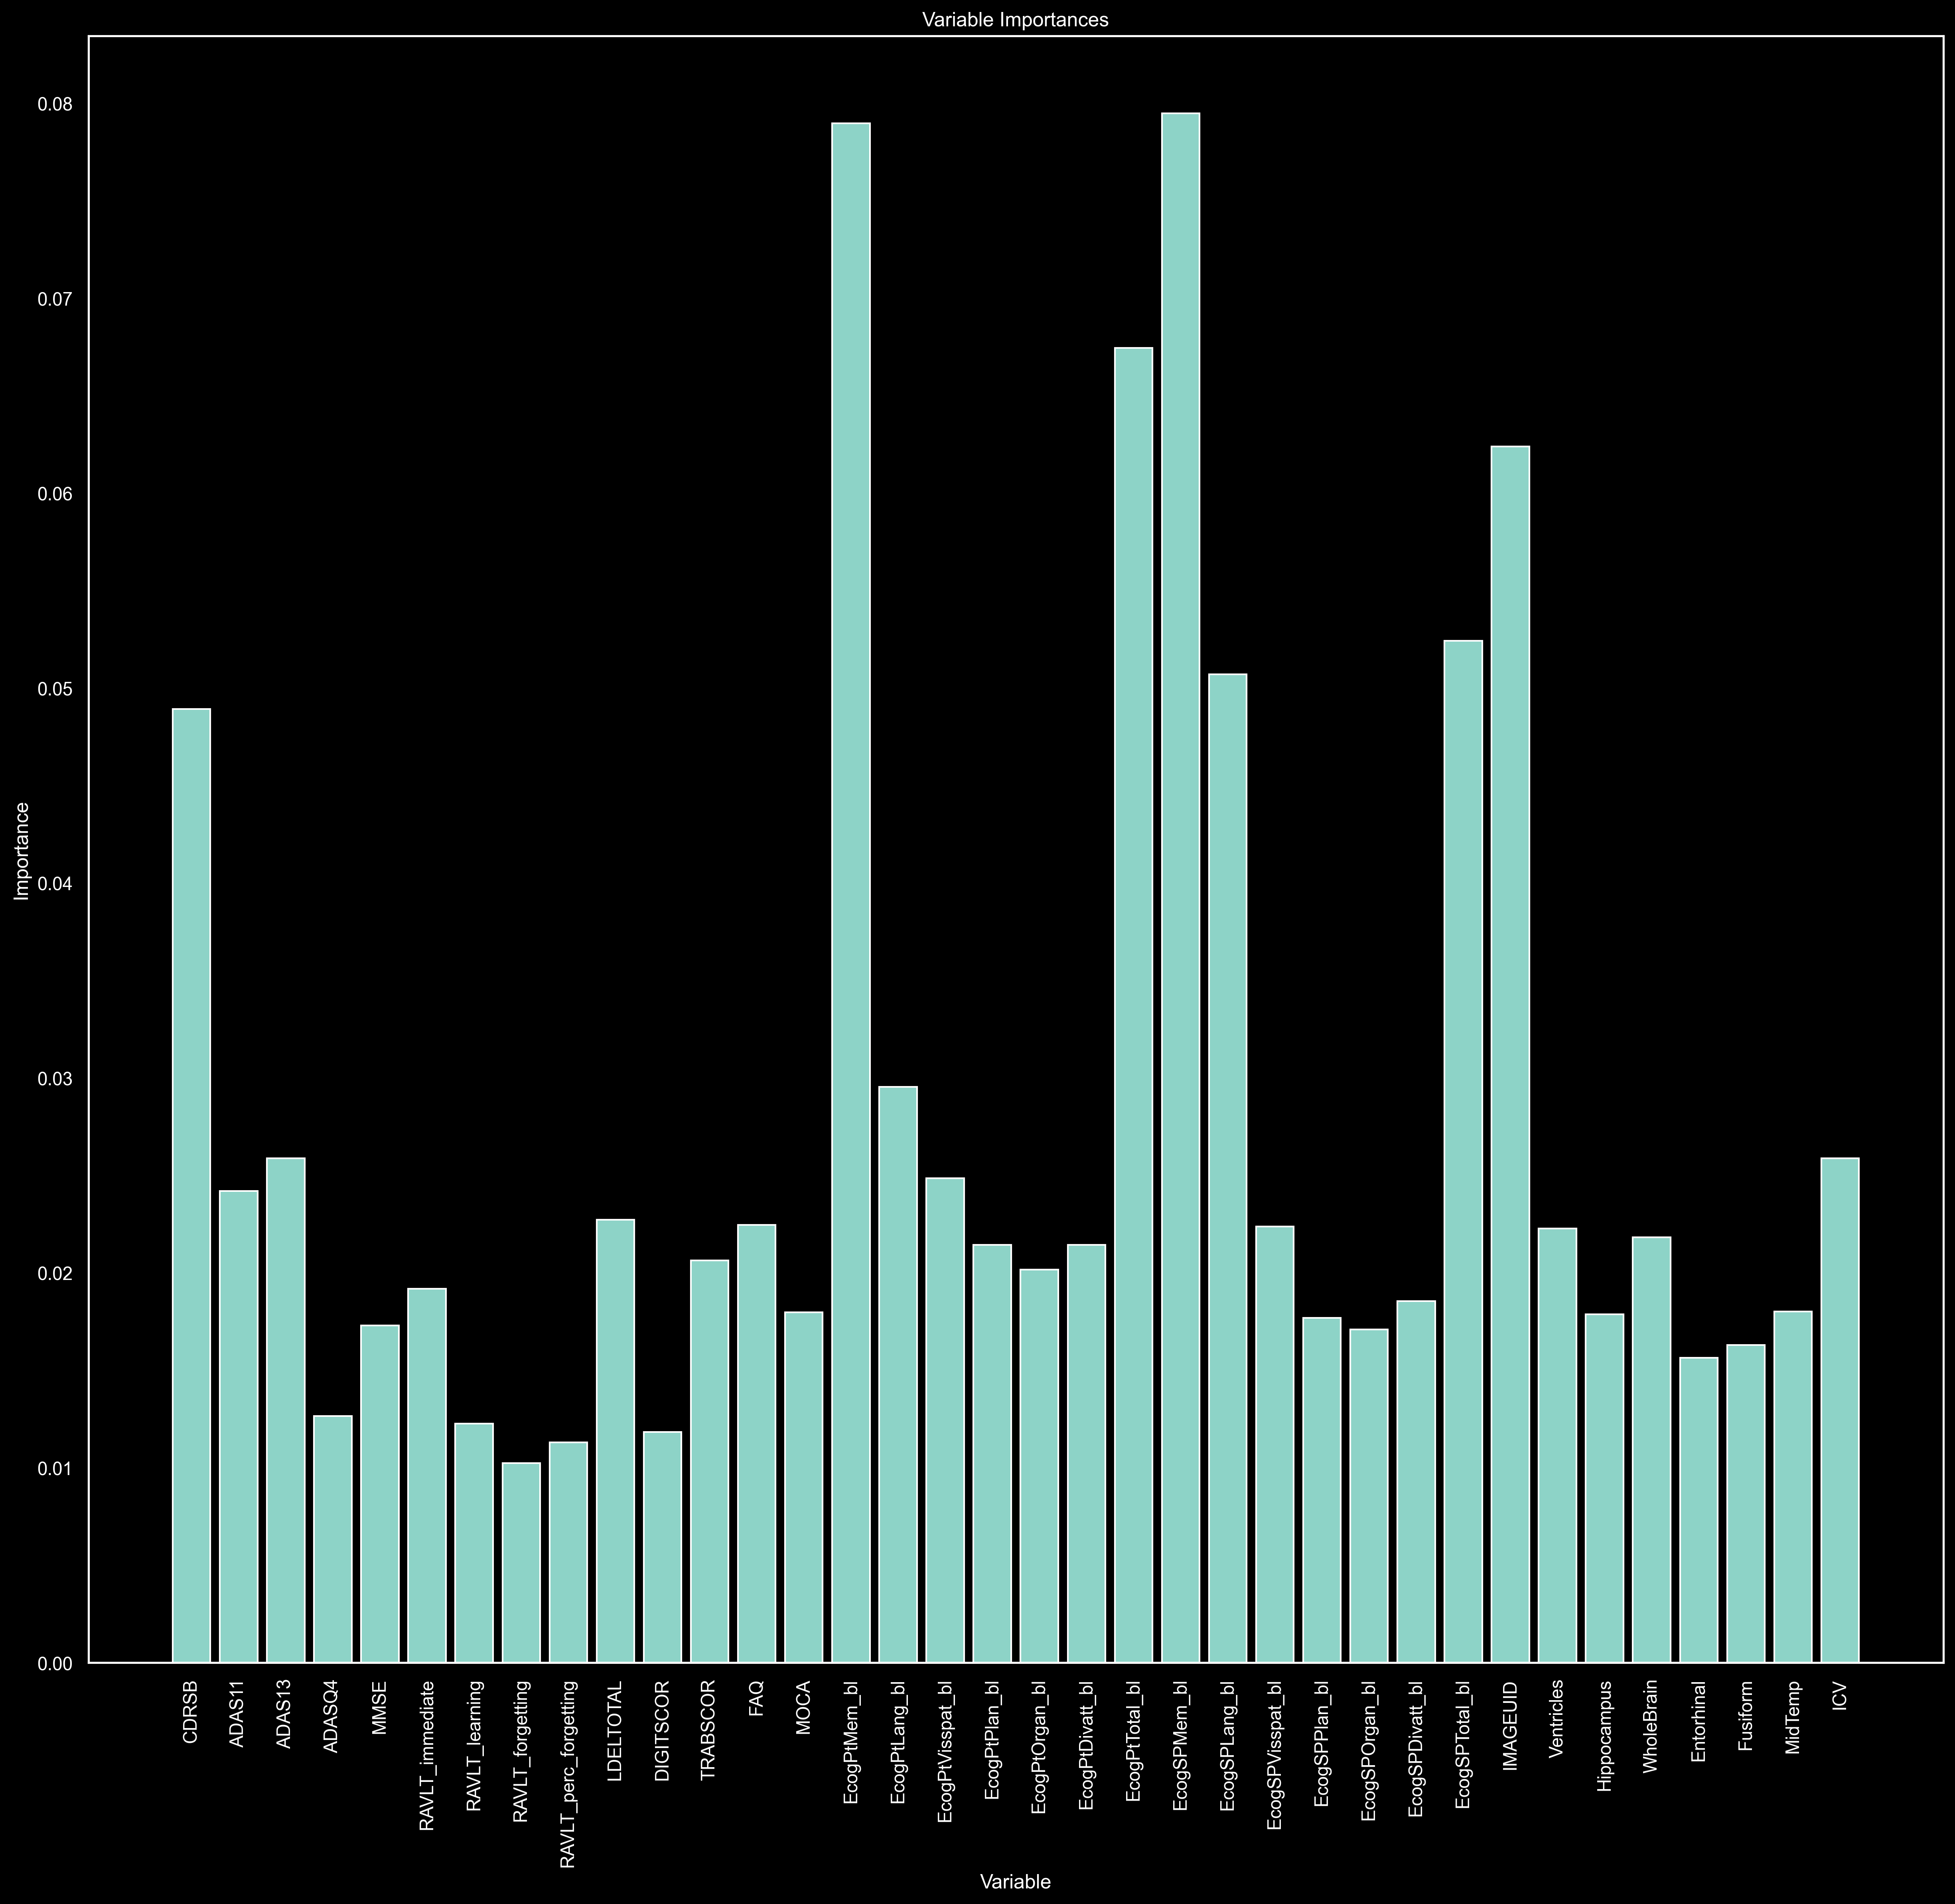

In [94]:
# Build RF regression model with optimal hyperparameters
from scipy import stats

import pydot
from sklearn.tree import export_graphviz
random_forest_model_final=random_forest_model_test_2_random.best_estimator_

# Predict test set data

random_forest_predict=random_forest_model_test_2_random.predict(X_test)
random_forest_error=random_forest_predict-y_test

# Draw test plot

plt.figure(1)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(y_test,random_forest_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims=[0,10000]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
plt.grid(False)

plt.figure(2)
plt.clf()
plt.hist(random_forest_error,bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.grid(False)

# Verify the accuracy

random_forest_pearson_r=stats.pearsonr(y_test,random_forest_predict)
random_forest_R2=metrics.r2_score(y_test,random_forest_predict)
random_forest_RMSE=metrics.mean_squared_error(y_test,random_forest_predict)**0.5
print('Pearson correlation coefficient is {0}, and RMSE is {1}.'.format(random_forest_pearson_r[0],
                                                                        random_forest_RMSE))

# # Save key parameters

# excel_file=load_workbook(write_excel_path)
# excel_all_sheet=excel_file.sheetnames
# excel_write_sheet=excel_file[excel_all_sheet[0]]
# excel_write_sheet=excel_file.active
# max_row=excel_write_sheet.max_row
# excel_write_content=[random_forest_pearson_r[0],random_forest_R2,random_forest_RMSE,
#                      random_seed,random_forest_seed]
# for i in range(len(excel_write_content)):
#         exec("excel_write_sheet.cell(max_row+1,i+1).value=excel_write_content[i]")
# excel_file.save(write_excel_path)

# Draw decision tree visualizing plot

tree_graph_dot_path=img_path+"/tree.dot"
train_X_column_name=list(X_train.columns)
tree_graph_png_path=img_path+"/tree.png"


random_forest_tree=random_forest_model_final.estimators_[5]
export_graphviz(random_forest_tree,out_file=tree_graph_dot_path,
                feature_names=train_X_column_name,rounded=True,precision=1)
(random_forest_graph,)=pydot.graph_from_dot_file(tree_graph_dot_path)
random_forest_graph.write_png(tree_graph_png_path)

# Calculate the importance of variables

random_forest_importance=list(random_forest_model_final.feature_importances_)
random_forest_feature_importance=[(feature,round(importance,8)) 
                                  for feature, importance in zip(train_X_column_name,
                                                                 random_forest_importance)]
random_forest_feature_importance=sorted(random_forest_feature_importance,key=lambda x:x[1],reverse=True)
plt.figure(3)
plt.figure(figsize=(20,18),dpi=300)
plt.clf()
importance_plot_x_values=list(range(len(random_forest_importance)))
plt.bar(importance_plot_x_values,random_forest_importance,orientation='vertical')
plt.xticks(importance_plot_x_values,train_X_column_name,rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')